# Decision Tree VAL

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("train_cleaned_kmeans4.csv")
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance,3
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian,2
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal,3
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy,1


In [117]:
np.unique(df['popularity'], return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 88, 94]),
 array([1475,  214,  144,  108,  107,  133,  186,  134,  162,  175,  214,
         211,  193,  202,  227,  216,  286,  356,  368,  412,  395,  427,
         398,  415,  358,  338,  286,  232,  231,  242,  227,  222,  205,
         180,  183,  198,  169,  195,  144,  153,  178,  202,  194,  213,
         236,  224,  222,  238,  201,  206,  187,  171,  181,  137,  149,
         134,  118,  138,  113,  103,   78,   91,   82,   73,   64,   44,
          40,   36,   22,   34,   23,   14,   24,   17,   11,    9,   12,
           8,   12,    9,    9,    9,    2,    4,    2,    2,    2,    1]))

In [118]:
np.unique(df['key'], return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([1741, 1568, 1481,  427, 1081, 1209, 1089, 1800,  905, 1431, 1063,
        1205]))

In [119]:
np.unique(df['instrumentalness'], return_counts = True)

(array([0.00e+00, 1.00e-06, 1.03e-06, ..., 9.98e-01, 9.99e-01, 1.00e+00]),
 array([3798,    4,    3, ...,    5,   15,   11]))

### Partitioning

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
df = df.replace({"explicit": {False:0, True:1}})

In [122]:
attributes = ['danceability', 'tempo', 'energy','loudness','acousticness','speechiness','instrumentalness','liveness','valence','key']

In [123]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

In [124]:
X = df[attributes].values
y = df["kmeans.labels_"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [127]:
dt = DecisionTreeClassifier()

In [128]:
%%time
dt.fit(X_train, y_train)

CPU times: user 110 ms, sys: 1.94 ms, total: 112 ms
Wall time: 118 ms


DecisionTreeClassifier()

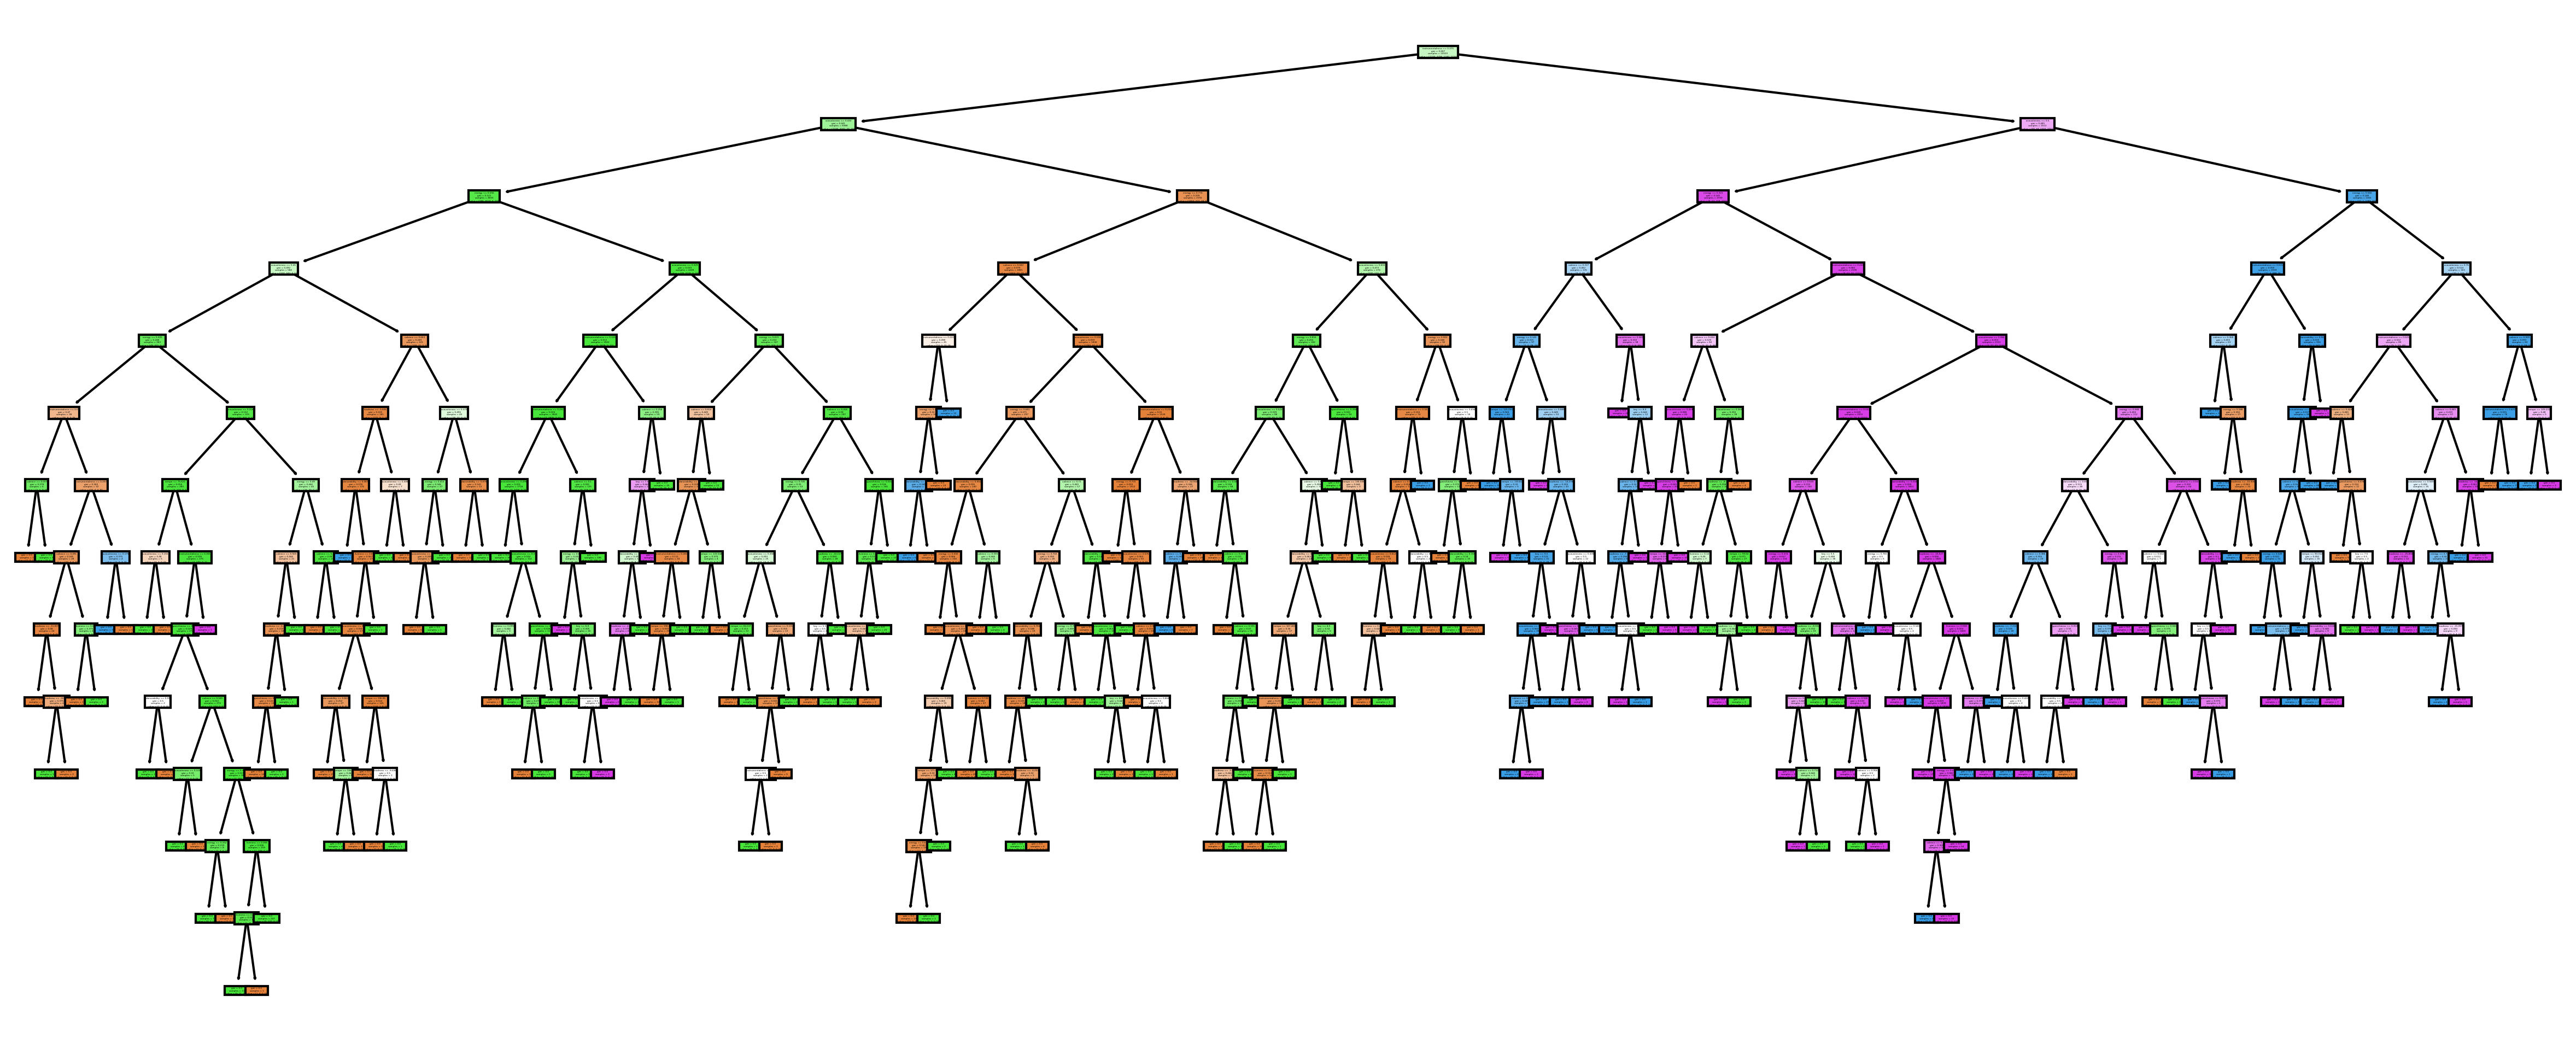

CPU times: user 28.8 s, sys: 834 ms, total: 29.7 s
Wall time: 40.9 s


In [129]:
%%time
plt.figure(figsize=(20, 8), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.savefig('Decision tree VAL.png')
plt.show()

In [130]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [131]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [132]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1.]

Test Accuracy 0.9655555555555555
Test F1-score [0.94603175 0.97435897 0.9588785  0.96956978]


In [133]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       956
           1       0.97      0.98      0.97      2056
           2       0.95      0.97      0.96       531
           3       0.97      0.97      0.97       957

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



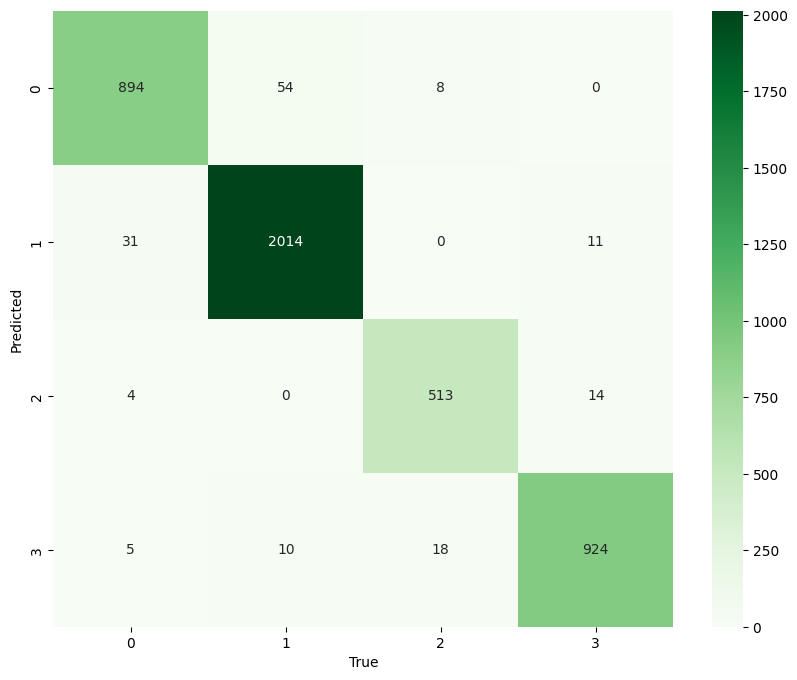

In [134]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

Feature Importance

In [135]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

acousticness 0.501146913182997
instrumentalness 0.35102749086402213
energy 0.08802646322016812
valence 0.031510453018622424
danceability 0.00856999820799334
loudness 0.006325654842303424
tempo 0.00423994830143765
key 0.0031980539995652437
speechiness 0.0029940352935579517
liveness 0.0029609890693326553


In [136]:
dt.feature_importances_

array([0.00857   , 0.00423995, 0.08802646, 0.00632565, 0.50114691,
       0.00299404, 0.35102749, 0.00296099, 0.03151045, 0.00319805])

In [137]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [138]:
y_test_pred

array([0, 0, 0, ..., 1, 1, 1])

In [139]:
y_test

7642     0
14849    0
3943     0
11358    1
9566     1
        ..
12336    3
2634     1
13362    1
7700     1
12388    1
Name: kmeans.labels_, Length: 4500, dtype: int64

In [140]:
dt.predict_proba(X_test)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [141]:
accuracy_score(y_test,y_test_pred)

0.9655555555555555

In [142]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred, average='micro')

0.9655555555555555

In [143]:
precision_score(y_test,y_test_pred, average='macro')

0.9629484015477632

In [144]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

In [145]:
X

array([[6.90000e-01, 1.42221e+02, 5.13000e-01, ..., 2.81000e-01,
        6.35000e-01, 5.00000e+00],
       [6.90000e-02, 7.55960e+01, 1.96000e-01, ..., 3.60000e-01,
        3.36000e-02, 1.00000e+00],
       [3.63000e-01, 1.16628e+02, 8.54000e-01, ..., 2.62000e-01,
        4.89000e-01, 2.00000e+00],
       ...,
       [7.99000e-01, 1.26000e+02, 5.35000e-01, ..., 7.13000e-02,
        7.08000e-02, 1.00000e+00],
       [5.11000e-01, 1.60044e+02, 9.70000e-01, ..., 4.02000e-01,
        2.70000e-01, 5.00000e+00],
       [6.78000e-01, 8.80030e+01, 5.18000e-01, ..., 8.80000e-02,
        7.84000e-01, 6.00000e+00]])

In [146]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = attributes).sort_values(0, ascending=False)
feature_importance

,0
acousticness,0.501147
instrumentalness,0.351027
energy,0.088026
valence,0.031510
danceability,0.008570
loudness,0.006326
tempo,0.004240
key,0.003198
speechiness,0.002994
liveness,0.002961


<Axes: >

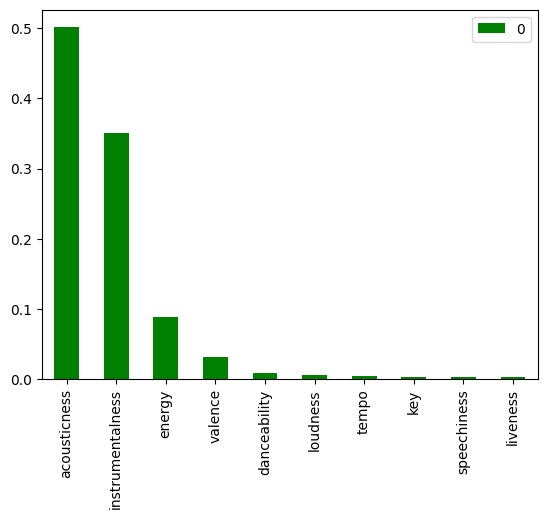

In [147]:
feature_importance.plot(kind='bar', color='green')

#### Decision Tree hyperparameters
max_depth : int, default=None <br>
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2 <br>
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

min_samples_leaf : int or float, default=1 <br>
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

In [148]:
from sklearn.model_selection import cross_val_score

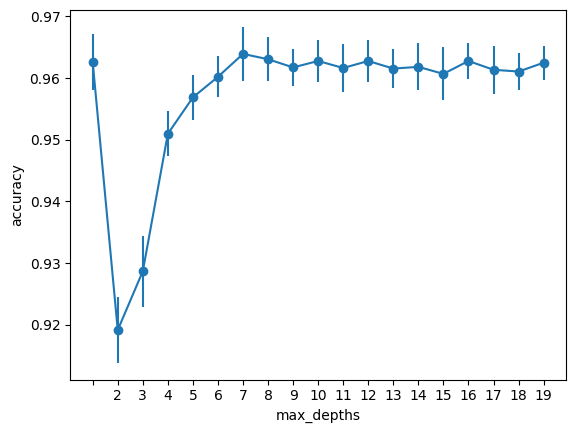

In [149]:
max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

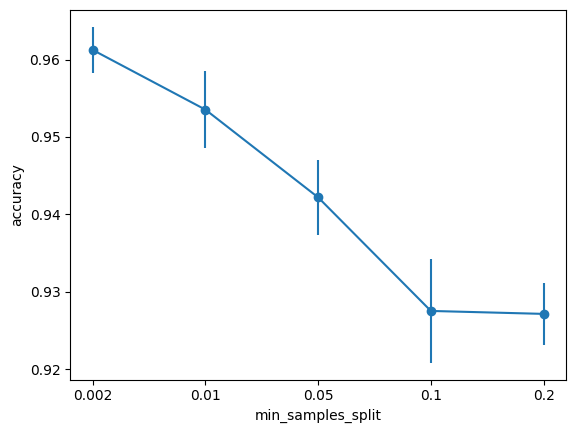

In [150]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

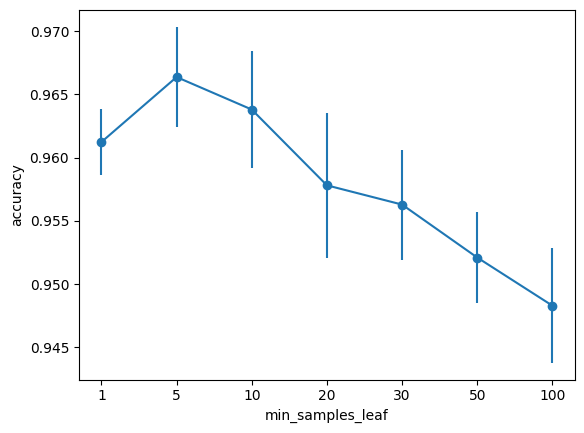

In [151]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Randomized Search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

print(random_search.best_params_, random_search.best_score_)

In [ ]:
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

In [156]:
clf.score(X_test, y_test)

0.9642222222222222

In [157]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1.]

Test Accuracy 0.9642222222222222
Test F1-score [0.94615787 0.9761789  0.94766355 0.96584341]


In [158]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       956
           1       0.98      0.98      0.98      2056
           2       0.94      0.95      0.95       531
           3       0.97      0.96      0.97       957

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500



In [159]:
results = pd.DataFrame(random_search.cv_results_)

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

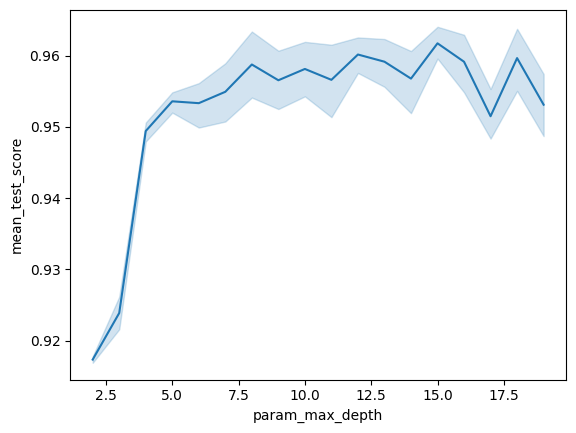

In [160]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<Axes: xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

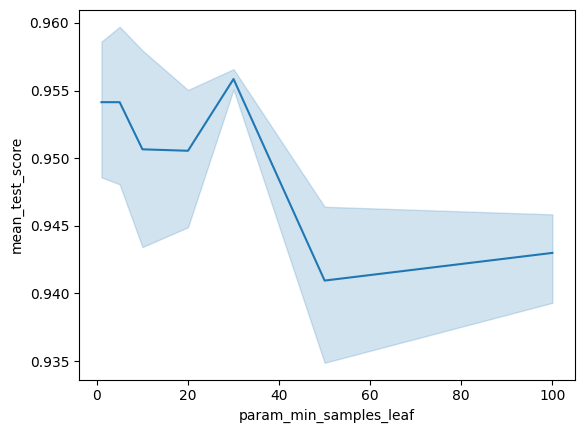

In [161]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

In [162]:
zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

instrumentalness 0.4826586641326343
acousticness 0.368181467029193
energy 0.10547557544319866
valence 0.02946902699903005
danceability 0.005033661493138441
key 0.002555817352698911
tempo 0.00239063756927087
loudness 0.0016617830070316628
speechiness 0.0015414176419924748
liveness 0.001031949331811586


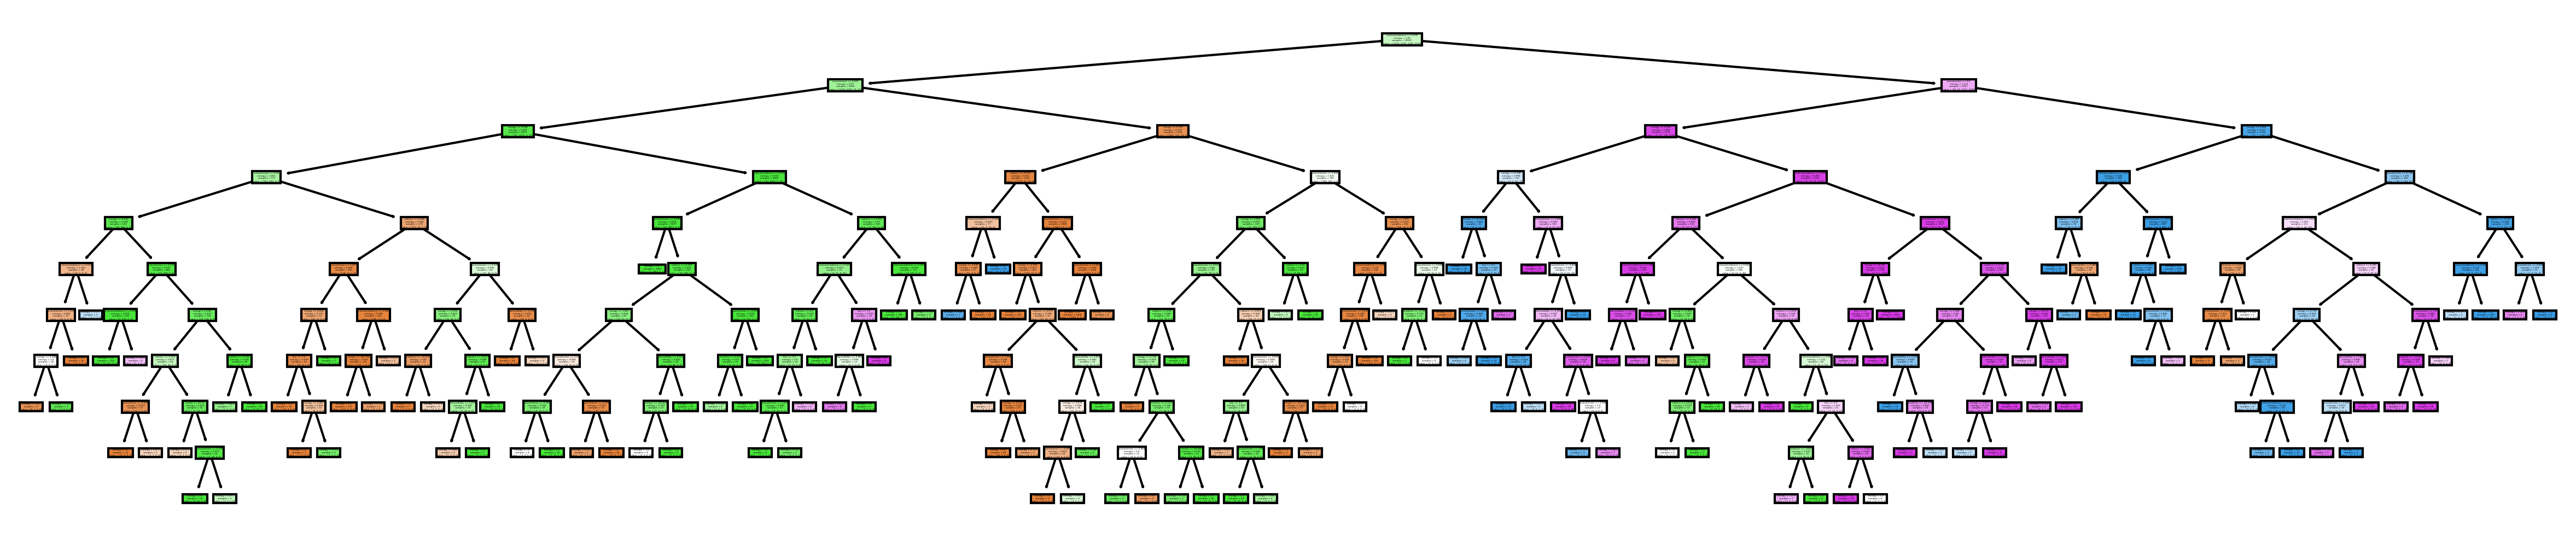

In [163]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(clf, feature_names=attributes, filled=True)
plt.show()

#### ccp_alphas
Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. <br>
Sklearn decision tree offers a function that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [164]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [165]:
for alpha, imp in zip(ccp_alphas, impurities):
    print(alpha, imp)

0.0 0.0694545690971764
1.7666355882514054e-06 0.06945633573276465
6.4775661465996115e-06 0.06946281329891124
6.635574817019782e-06 0.06946944887372826
7.173749686896892e-06 0.06947662262341515
2.834008097165946e-05 0.06950496270438682
2.9279228962333145e-05 0.06953424193334914
4.8230988147269756e-05 0.06958247292149641
0.00010863982589771394 0.06969111274739413
0.00011144042679312252 0.06980255317418725
0.00013806638207115342 0.06994061955625841
0.0005925760393691798 0.0705331955956276
0.0008363557346425018 0.07136955133027009
0.0008631582321421876 0.07223270956241228
0.0010225402718845146 0.07325524983429679
0.0011937622460637927 0.07444901208036059
0.0012745936418042825 0.07572360572216487
0.0015884529772717945 0.07890051167670846
0.0016137966541400553 0.08212810498498857
0.002310749848632162 0.08443885483362074
0.0028978035593776492 0.08733665839299838
0.006135518565486513 0.09347217695848489
0.008983387894169012 0.1024555648526539
0.013554322930668989 0.1160098877833229
0.015337811

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

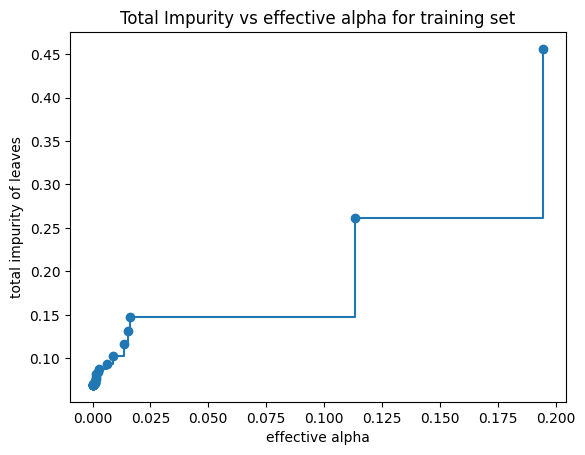

In [166]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [167]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 15,
 'criterion': 'entropy'}

In [168]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 5 with ccp_alpha: 0.23109659061029003


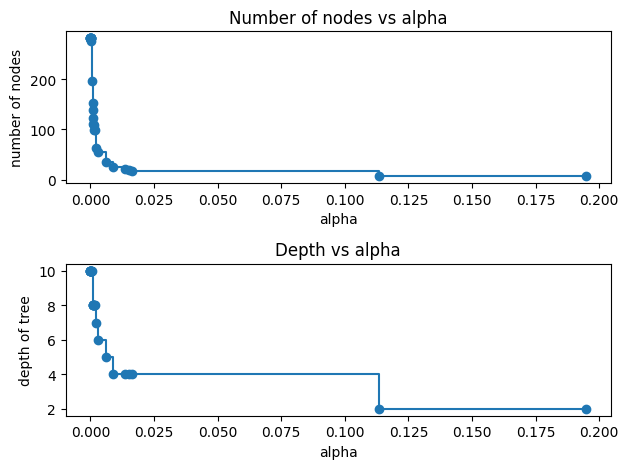

In [169]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

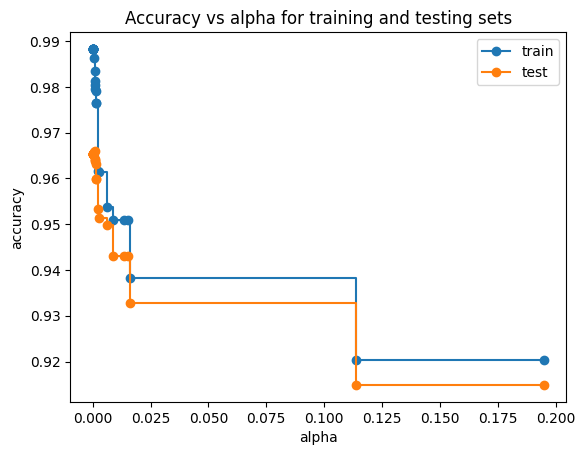

In [170]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()

# Find the index where the maximum testing accuracy occurs
best_alpha_idx = test_scores.index(max(test_scores))

# Draw a vertical line at the corresponding alpha value
best_alpha = ccp_alphas[best_alpha_idx]
ax.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha: {best_alpha:.4f}')
ax.legend()

plt.show()

In [171]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006, **random_search.best_params_)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, criterion='entropy', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5, random_state=0)

In [172]:
y_test_pred = dtp.predict(X_test)

In [173]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1.]

Test Accuracy 0.9497777777777778
Test F1-score [0.92857143 0.96771084 0.9197356  0.94859565]


In [174]:
y_test_pred = dtp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.9497777777777778


In [175]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       956
           1       0.96      0.98      0.97      2056
           2       0.92      0.92      0.92       531
           3       0.96      0.94      0.95       957

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



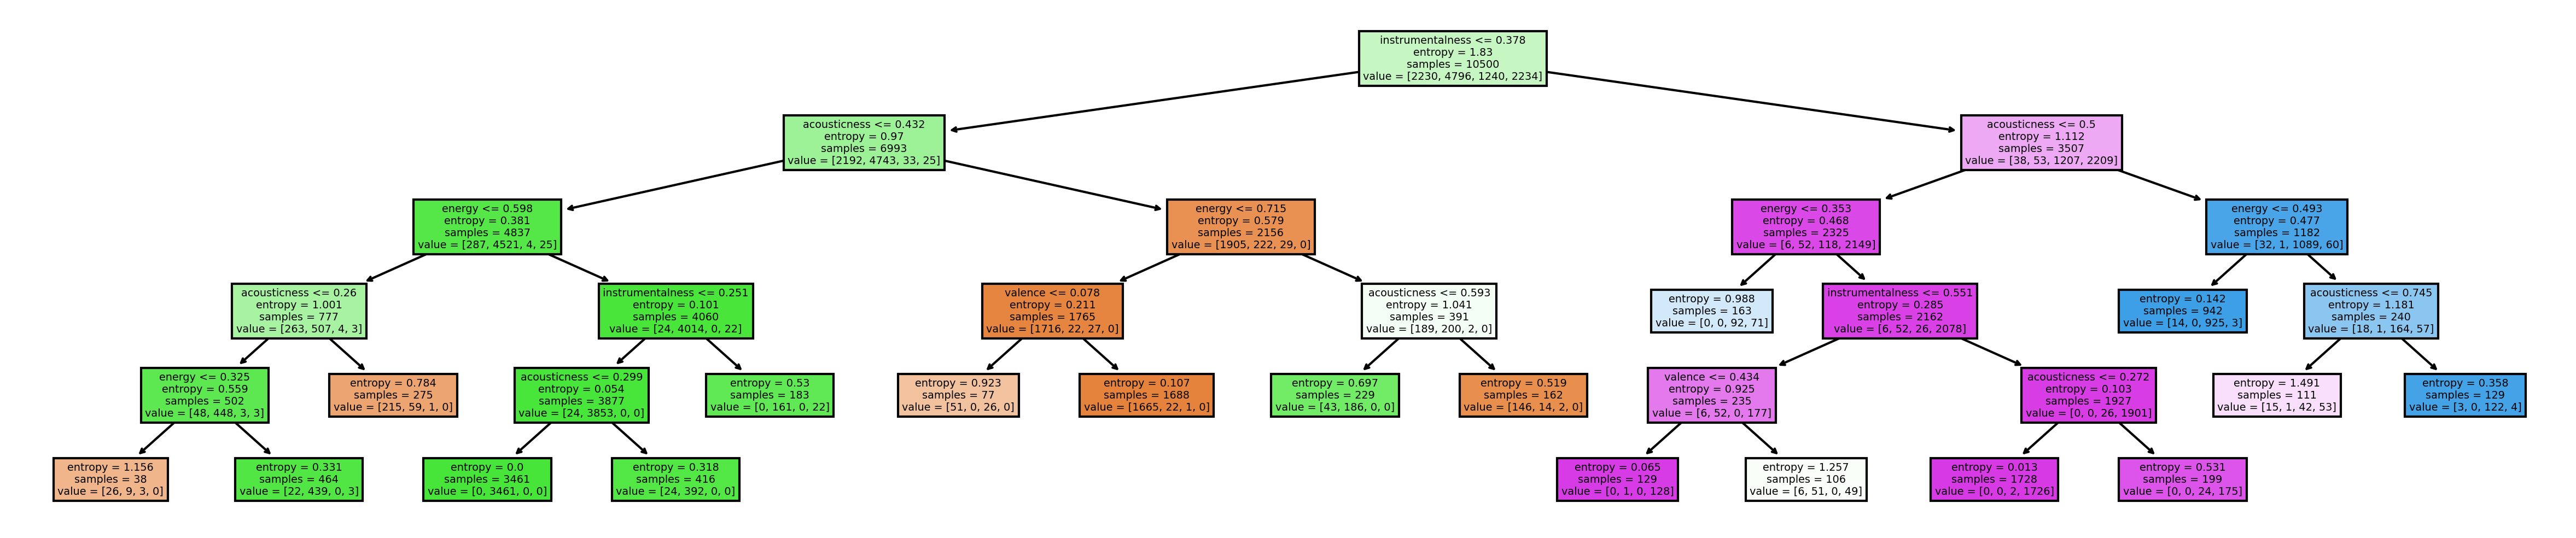

In [176]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dtp, feature_names=attributes, filled=True)
plt.show()

In [177]:
!pip install scikit-plot

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

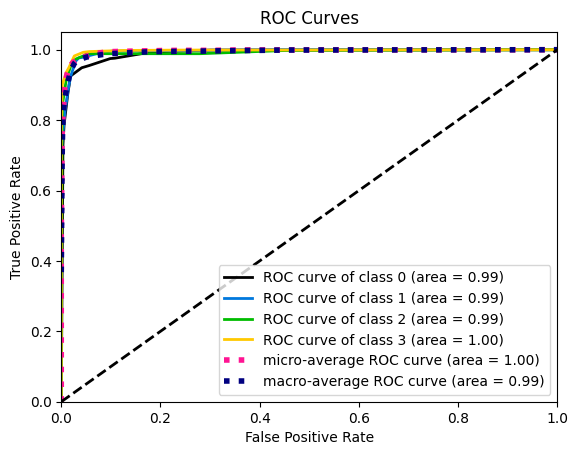

In [178]:
plot_roc(y_test, dtp.predict_proba(X_test))
plt.show()

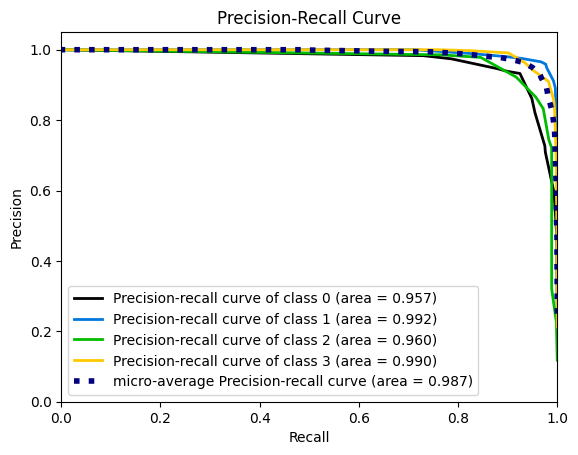

In [179]:
plot_precision_recall(y_test, dtp.predict_proba(X_test))
plt.show()